In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize 

import warnings
warnings.filterwarnings("ignore")

# Import own libraries 
import os, sys
script_path = os.path.realpath(os.path.dirname("10_on_trajectories"))
os.chdir(script_path)
sys.path.append("..")

from myLibraries.queries import * 
from myLibraries.events import *
from myLibraries.theoretical_functions import *

In [3]:
HOLE_SIZE = 7
ACTIVITY = 5
MIN_PUBS = 3
EVENTS = get_pubs_eventACTIVE(HOLE_SIZE, ACTIVITY, MIN_PUBS)
ALL_EVENTS = get_allEvents(EVENTS)

YEARS = get_str_years_event()

# get rid of misleading years
YEARS_TO_CONSIDER = YEARS[1: -6]
EVENTS_TO_CONSIDER = EVENTS[1: -6]

In [39]:
# all new publication events
get_pubs_event()

[1,
 2084,
 4330,
 7340,
 11335,
 16225,
 22329,
 30383,
 39919,
 51199,
 61603,
 74589,
 88256,
 106301,
 125354,
 146205,
 169263,
 200417,
 236223,
 280243,
 326575,
 378795,
 430430,
 489011,
 547532,
 613653,
 676622,
 743175,
 809496,
 877073]

In [38]:
# active new publication events
get_pubs_eventACTIVE(HOLE_SIZE, ACTIVITY, MIN_PUBS)

[1,
 562,
 1217,
 2060,
 3117,
 4444,
 5981,
 8181,
 10856,
 14070,
 17001,
 20851,
 25013,
 30706,
 36433,
 42767,
 49386,
 58708,
 69123,
 81655,
 94378,
 108435,
 120884,
 134327,
 146113,
 159298,
 170770,
 183139,
 195858,
 208807]

# **Logarithmic Trajectories**

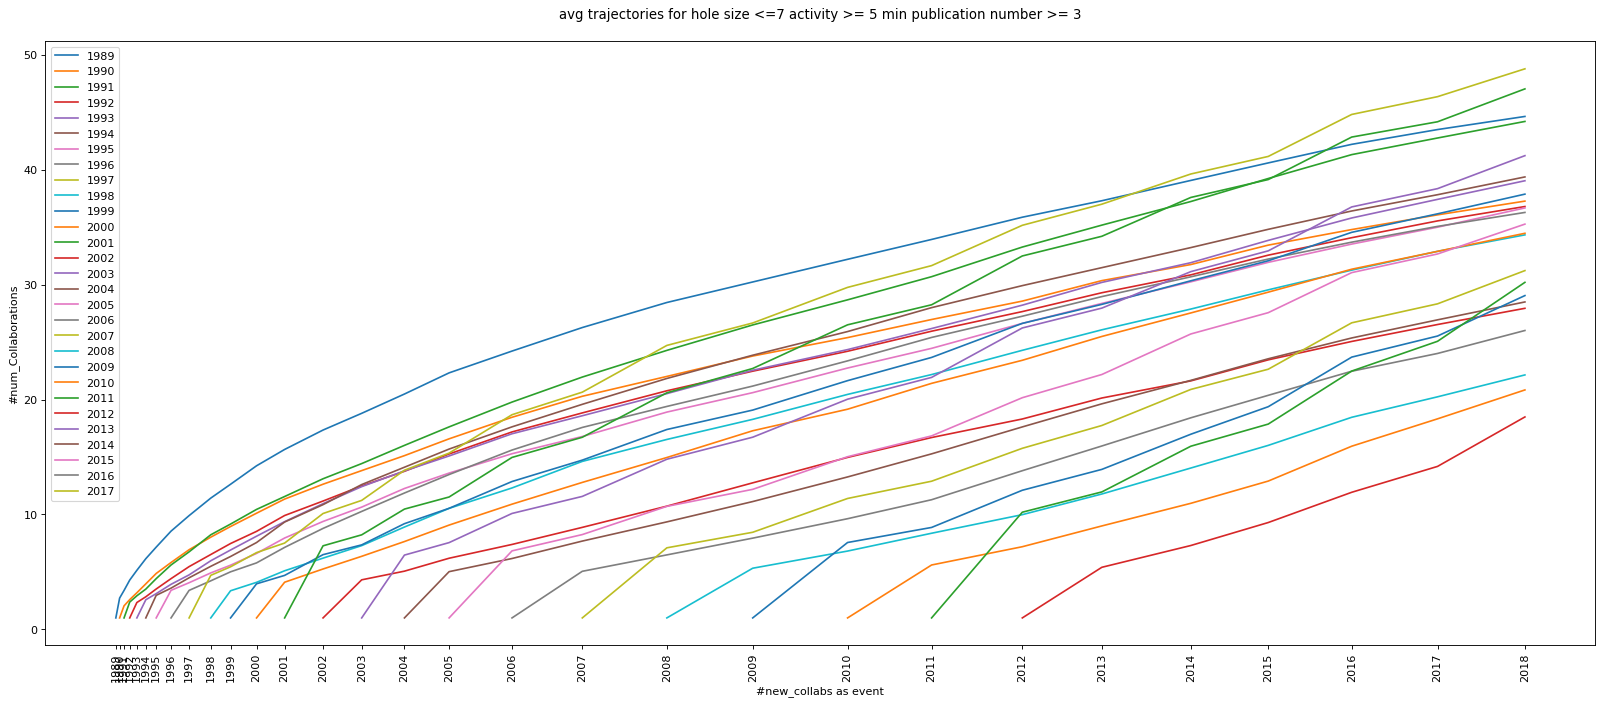

In [4]:
## Plot average trajectories 
plt.figure(figsize=(25, 10), dpi=80)
plt.title("avg trajectories for hole size <=" + str(HOLE_SIZE) + " activity >= " + str(ACTIVITY)+ " min publication number >= " + str(MIN_PUBS) + "\n", fontdict = {'fontsize' : 12})
plt.xlabel("#new_collabs as event")
plt.ylabel("#num_Collaborations")
plt.xticks(rotation='vertical')

for start_y in YEARS[:-1]:
    x,y = get_avg_trajectories(EVENTS, HOLE_SIZE, start_y, activity=ACTIVITY, minPubs=MIN_PUBS)
    
    if(len(y)==1):
        plt.scatter(x,y)
    else:
        plt.plot(x,y)
    
    plt.xticks(x, y)
    plt.xticks(rotation='vertical')
    
plt.legend(YEARS, loc='upper left')
plt.xticks(EVENTS, YEARS)
plt.show()

# **(2) Plotting fitting function**

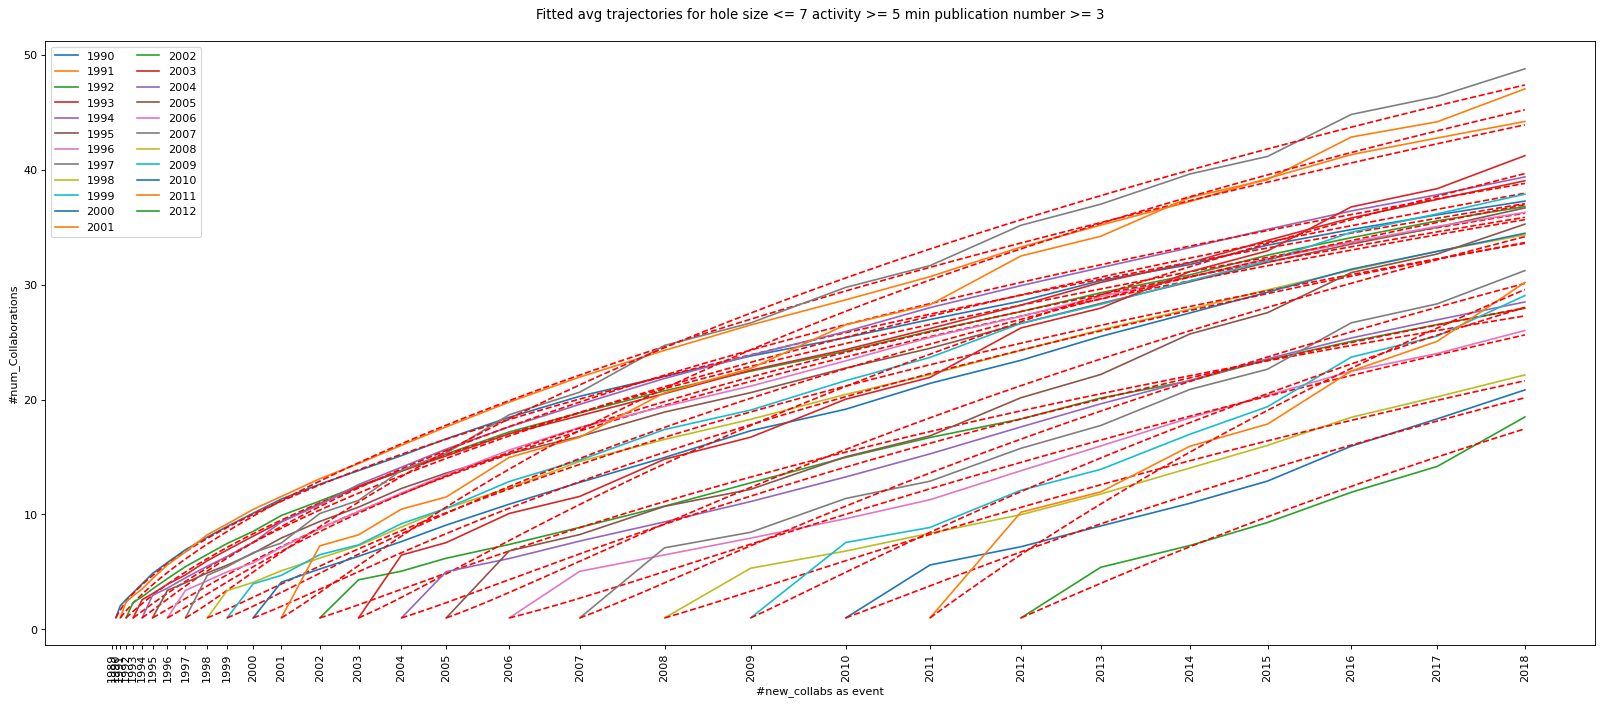

In [5]:
## Plot fitted average trajectories
plt.figure(figsize=(25, 10), dpi=80)
plt.title("Fitted avg trajectories for hole size <= " + str(HOLE_SIZE ) + " activity >= " + str(ACTIVITY)+ " min publication number >= " + str(MIN_PUBS) + "\n", fontdict = {'fontsize' : 12})
plt.xlabel("#new_collabs as event")
plt.ylabel("#num_Collaborations")
plt.xticks(rotation='vertical')

alphas = []
betas = []
for start_y in YEARS_TO_CONSIDER:
    
    
    x,y = get_avg_trajectories(EVENTS, HOLE_SIZE, start_y, activity=ACTIVITY, minPubs=MIN_PUBS) # retrieve average trajecory for the given start_y (and hole size)     
    
    fit_y, alpha, beta = fit_trajectory(x, y) # fit the real data above with the theoretical trajectory 
    
    xdata = [a for a in range(x[0], x[-1])]
    fit_y = theoretical_func(xdata, alpha, beta, x[0])

    # save fitted parameters alpha, beta
    alphas.append(alpha)
    betas.append(beta)
        
    plt.plot(x,y, label=str(start_y))
    plt.plot(xdata, fit_y, 'r--')
   
plt.xticks(rotation='vertical')    
plt.legend(loc='upper left', ncol=2)
plt.xticks(EVENTS, YEARS)
plt.show()

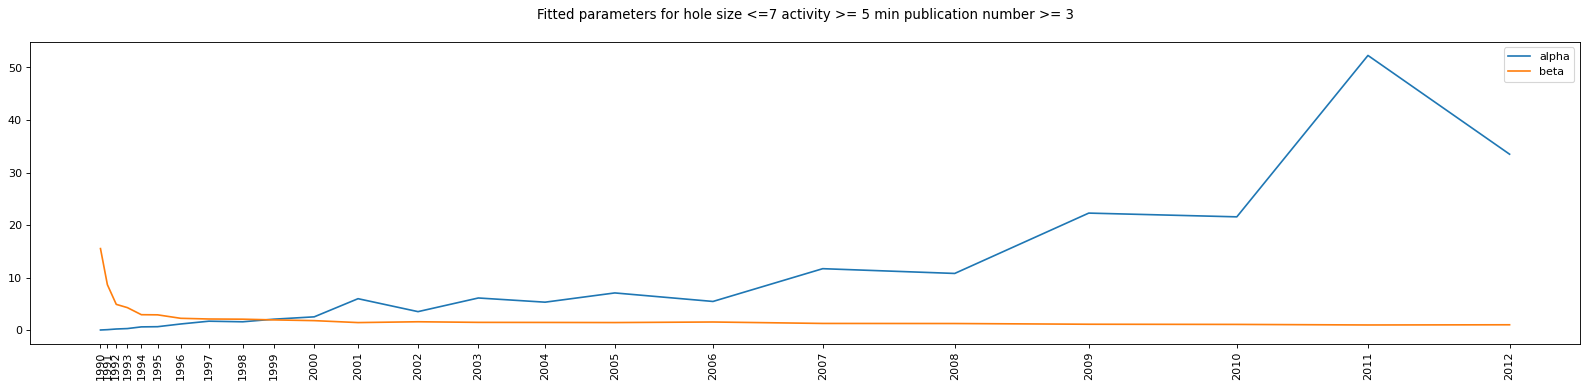

   start_y      alpha       beta
0     1990   0.044241  15.533859
1     1991   0.106344   8.666523
2     1992   0.232447   4.922136
3     1993   0.316243   4.299770
4     1994   0.636354   2.954520
5     1995   0.672022   2.929231
6     1996   1.188846   2.266652
7     1997   1.719355   2.136790
8     1998   1.606175   2.099722
9     1999   2.098982   1.967379
10    2000   2.546392   1.825115
11    2001   6.000681   1.454856
12    2002   3.538118   1.611287
13    2003   6.134852   1.495857
14    2004   5.337466   1.482377
15    2005   7.097159   1.460036
16    2006   5.475246   1.564886
17    2007  11.710368   1.292077
18    2008  10.805209   1.275164
19    2009  22.287251   1.138293
20    2010  21.575440   1.105426
21    2011  52.285842   1.000000
22    2012  33.495502   1.036745


In [6]:
## Plotting and Printing fitted parameters alpha and beta for each starting year
plt.figure(figsize=(25, 5), dpi=80)
plt.title("Fitted parameters for hole size <=" + str(HOLE_SIZE) + " activity >= " + str(ACTIVITY)+ " min publication number >= " + str(MIN_PUBS) + "\n", fontdict = {'fontsize' : 12})

plt.plot(EVENTS_TO_CONSIDER, alphas, label="alpha")
plt.plot(EVENTS_TO_CONSIDER, betas, label="beta")
plt.xticks(EVENTS_TO_CONSIDER, YEARS_TO_CONSIDER)
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

print(pd.DataFrame([[YEARS_TO_CONSIDER[i], alphas[i], betas[i]] for i in range(len(alphas))], columns=["start_y", "alpha", "beta"]))

# **(3)** Find **alpha\* and beta\*** to have a function **f\*** minimizing the **errors**

given a starting event $i$:
- Let $e$ be a generic event
- Let $r_i(e)$ be the function representing the real average trajectory for authors who started to publish at the event $i$
- Let $f_i(e)$ be the fitted function of $r_i(e)$
- Let $f_i^*(e)$ be the general fitting function of which we want to optimized the parameters, for authors who started to publish at the event $i$

#### A) $min_{\alpha^*,\sigma^*} \Biggl( \sum_i \sum_{e\geq i} |f_i^* (e) - r_i(e) |^2 \Biggr)$
#### B) $min_{\alpha^*,\sigma^*} \Biggl( \sum_i \max_{e\geq i} |f_i^* (e) - r_i(e) |^2 \Biggr)$ 

#### C) $min_{\alpha^*,\sigma^*} \Biggl( \sum_i \sum_{e\geq i} |f_i^* (e) - f_i(e) |^2 \Biggr)$ 
#### D) $min_{\alpha^*,\sigma^*} \Biggl( \sum_i \max_{e\geq i} |f_i^* (e) - f_i(e) |^2 \Biggr)$ 

In [7]:
 ##### ERRORS FUNCTIONS FOR AVERAGE TRAJECTORIES #####

YEARS = get_str_years_event()

## error function to minimize in order to find alpha* and beta*
    ## this function compare f* with real data 
def err_f_A(params, xdata, years_to_consider=YEARS):
    opt_alpha, opt_beta = params
    err = 0
    for start_y in years_to_consider:
        i = YEARS.index(start_y)
        x,y = get_avg_trajectories(xdata, HOLE_SIZE, start_y, activity=ACTIVITY, minPubs=MIN_PUBS)
        for curr_y in YEARS[i:][:-1]:
            e = YEARS.index(curr_y)
            err += pow(abs(theoretical_func(xdata[e], opt_alpha, opt_beta, xdata[i]) - y[YEARS[i:][:-1].index(curr_y)]), 2)

    sys.stdout.write('\r'+ "optimizing A function with -> params: " + str(params) +", error: "+ str(err))
    return err

## error function to minimize in order to find alpha* and beta*
    ## this function compare f* with real data 
def err_f_B(params, xdata, years_to_consider=YEARS):
    opt_alpha, opt_beta = params
    
    err = 0
    for start_y in years_to_consider:
        i = YEARS.index(start_y)
        
        x,y = get_avg_trajectories(xdata, HOLE_SIZE, start_y, activity=ACTIVITY, minPubs=MIN_PUBS)
        
        tmp = []
        for curr_y in YEARS[i:][:-1]:
            e = YEARS.index(curr_y)
        
            tmp.append(pow(abs(theoretical_func(xdata[e], opt_alpha, opt_beta, xdata[i]) - y[YEARS[i:][:-1].index(curr_y)]), 2))
        err += np.max(tmp)
    
    sys.stdout.write('\r'+ "optimizing B function with -> params: " + str(params) +", error: "+ str(err))
    return err

SUBSET_SIZE = 200 # the next error function works on all events, choose the number of event to be considered 

## error function to minimize in order to find alpha* and beta*
    ## this function compare f* with fitted data f_i 
        ## we consider a subset of events for computational costs
def err_f_C(params, xdata, years_to_consider=YEARS):
    opt_alpha, opt_beta = params
    
    size = SUBSET_SIZE # subset of events to consider 
        
    err = 0
    for start_y in years_to_consider:
        

    
        i = YEARS.index(start_y)    
        curr_x = xdata[i]  
        
        all_events = [e for e in range(curr_x, xdata[-1])]
        next_events = all_events
        n = (len(next_events))//size
        
        if(n>0):

            events_subset = [next_events[e] for e in range(len(next_events)) if e%n==0][:size]
            
            x,y = get_avg_trajectories(xdata, HOLE_SIZE, start_y, activity=ACTIVITY, minPubs=MIN_PUBS)
            fit_y, alpha, beta = fit_trajectory(x, y) # fit the real data above with the theoretical trajectory 
            

            for e in events_subset:
                if(e>curr_x):
                    err += pow(abs(theoretical_func(e, opt_alpha, opt_beta, xdata[i]) - theoretical_func(e, alpha, beta, xdata[i])), 2)

    sys.stdout.write('\r'+ "optimizing C function with " + str(size) + " events -> params: " + str(params) +", error: "+ str(err))
    return err

## error function to minimize in order to find alpha* and beta*
    ## this function compare f* with fitted data f_i 
        ## we consider a subset of events for computational costs
def err_f_D(params, xdata, years_to_consider=YEARS):
    
    opt_alpha, opt_beta = params
    
    size = SUBSET_SIZE # subset of events to consider 

    
    err = 0
    for start_y in years_to_consider:
        i = YEARS.index(start_y)
        
        curr_x = xdata[i] 
        
        all_events = [e for e in range(curr_x, xdata[-1])]
        next_events = all_events
        n = (len(next_events))//size
        
        if(n>0): 
            
            events_subset = [next_events[e] for e in range(len(next_events)) if e%n==0][:size]

            x,y = get_avg_trajectories(xdata, HOLE_SIZE, start_y, activity=ACTIVITY, minPubs=MIN_PUBS)
            fit_y, alpha, beta = fit_trajectory(x, y) # fit the real data above with the theoretical trajectory 

            tmp = []
            for e in events_subset:
                if(e>curr_x):
                    tmp.append(pow(abs(theoretical_func(e, opt_alpha, opt_beta, xdata[i]) - theoretical_func(e, alpha, beta, xdata[i])), 2))
                
            if((len(tmp))!=0):
                err += np.max(tmp)
        
    sys.stdout.write('\r'+ "optimizing D function with " + str(size) + " events -> params: " + str(params) +", error: "+ str(err))
    return err

In [10]:
## optimize alpha* and beta* for each error function defined above 
alphas_opt,betas_opt, errs = [],[],[]

start_params = [1, 1]
bnds = ((0, None), (1, None))

# retrieve alpha* and beta* minimizing the associated function and
    # compute the error made by the optimized parameters 

result_A = minimize(err_f_A, start_params, args=(EVENTS, YEARS_TO_CONSIDER), bounds=bnds)
fitted_params_A = result_A.x
alphas_opt.append(fitted_params_A[0])
betas_opt.append(fitted_params_A[1])
errs.append(err_f_A(fitted_params_A, EVENTS, YEARS_TO_CONSIDER))
print()

result_B = minimize(err_f_B, [1, 1], args=(EVENTS, YEARS_TO_CONSIDER), bounds=bnds)
fitted_params_B = result_B.x
alphas_opt.append(fitted_params_B[0])
betas_opt.append(fitted_params_B[1])
errs.append(err_f_B(fitted_params_B, EVENTS, YEARS_TO_CONSIDER))
print()


result_C = minimize(err_f_C, [1, 1], args=(EVENTS, YEARS_TO_CONSIDER), bounds=bnds)
fitted_params_C = result_C.x
alphas_opt.append(fitted_params_C[0])
betas_opt.append(fitted_params_C[1])
errs.append(err_f_C(fitted_params_C, EVENTS, YEARS_TO_CONSIDER))
print()

result_D = minimize(err_f_D, [1, 1], args=(EVENTS, YEARS_TO_CONSIDER), bounds=bnds)
fitted_params_D = result_D.x
alphas_opt.append(fitted_params_D[0])
betas_opt.append(fitted_params_D[1])
errs.append(err_f_D(fitted_params_D, EVENTS,  YEARS_TO_CONSIDER))
print()


optimizing C function with 200 events -> params: [8.38682195 1.        ], error: 479976.87267130084
optimizing D function with 200 events -> params: [9.99605809 1.        ], error: 5770.337415150819562


In [12]:
alphas_opt = [7.41808246, 9.82569694, 8.38682195,9.99605809]
betas_opt = [1, 1, 1, 1 ]
errs = [33434.897851502494, 5287.0170907858585,479976.87267130084 ,5770.337415150819562 ]
print()
print(pd.DataFrame([[errs[i], alphas_opt[i], betas_opt[i]] for i in range(len(errs))], ["err_f_A", "err_f_B", "err_f_C", "err_f_D"], ["ERROR", "alpha", "beta",]))


                 ERROR     alpha  beta
err_f_A   33434.897852  7.418082     1
err_f_B    5287.017091  9.825697     1
err_f_C  479976.872671  8.386822     1
err_f_D    5770.337415  9.996058     1


# **(5) compare general fitting error functions A,B,C and D with the general average fitted one**  

### Error fitted trajectories

In [13]:
## get general fitting functions by starting year for each couple of parameter found above 
error_f_labels = ["A", "B", "C", "D"] 
error_fit_functions = {}

for i in range(len(error_f_labels)):
    # get general error fitted functions by starting year
    functions_by_start_y = [] # contains fitted error functions for each year 
    for start_y in YEARS_TO_CONSIDER:
        curr_x = EVENTS[YEARS.index(start_y)]  
        x,y = get_avg_trajectories(EVENTS, HOLE_SIZE, start_y, activity=ACTIVITY, minPubs=MIN_PUBS) # retrieve average trajecory for the given start_y (and hole size) 
        
        xdata = [e for e in range(x[0], x[-1])] # xdata is the list of events
        general_fit_y = theoretical_func(xdata, alphas_opt[i], betas_opt[i], curr_x)
        functions_by_start_y.append(general_fit_y)

    error_fit_functions[error_f_labels[i]] = functions_by_start_y

### **plot everything**

In [14]:
# given the start_y to consider it plots the real curver, the error fitted one and the average fitted toghether 
def plot_all(start_y):
    plt.figure(figsize=(25, 10), dpi=80)
    plt.title("compare general fitting error functions with the general average fitted one for the starting year " + start_y + " for hole size <=" + str(HOLE_SIZE) + " activity >= " + str(ACTIVITY)+ " min publication number >= " + str(MIN_PUBS)  +  "\n", fontdict = {'fontsize' : 12})
    plt.xlabel("#new_collabs as event")
    plt.ylabel("#num_Collaborations")
    plt.xticks(rotation='vertical')

    j = YEARS_TO_CONSIDER.index(start_y)
    x,y = get_avg_trajectories(EVENTS, HOLE_SIZE, start_y, activity=ACTIVITY, minPubs=MIN_PUBS) # retrieve average trajecory for the given start_y (and hole size) 
    plt.plot(x,y, label="real data")

    xdata = [e for e in range(x[0],x[-1])]

    for i in range(len(error_f_labels)):
        err_f = error_fit_functions[error_f_labels[i]][j]
        plt.plot(xdata, err_f, label="error fit function "+ error_f_labels[i])

    plt.xticks(rotation='vertical')    
    plt.legend(loc='upper left')    
    plt.xticks(x, YEARS[YEARS.index(start_y):])
    plt.show()

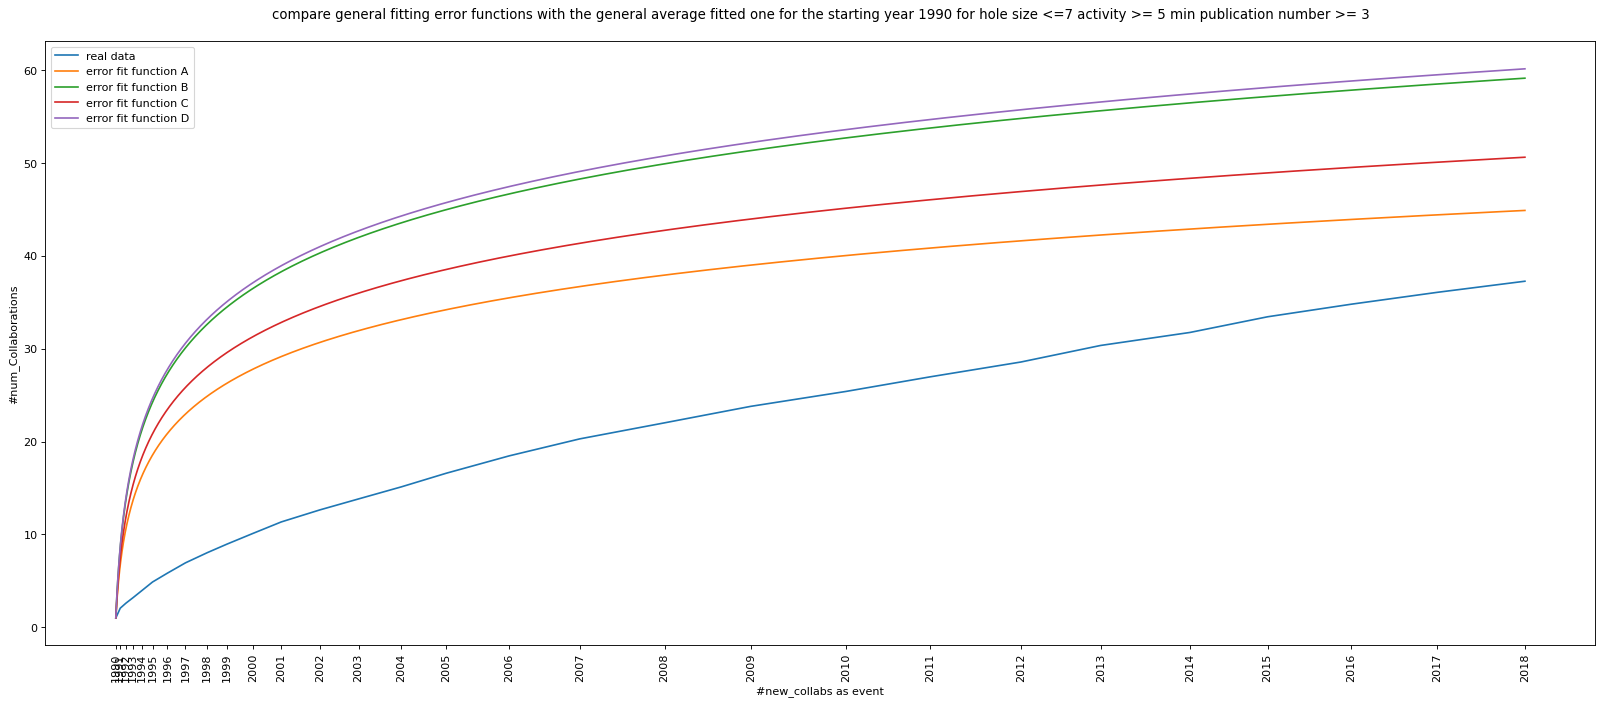

In [15]:
plot_all("1990")

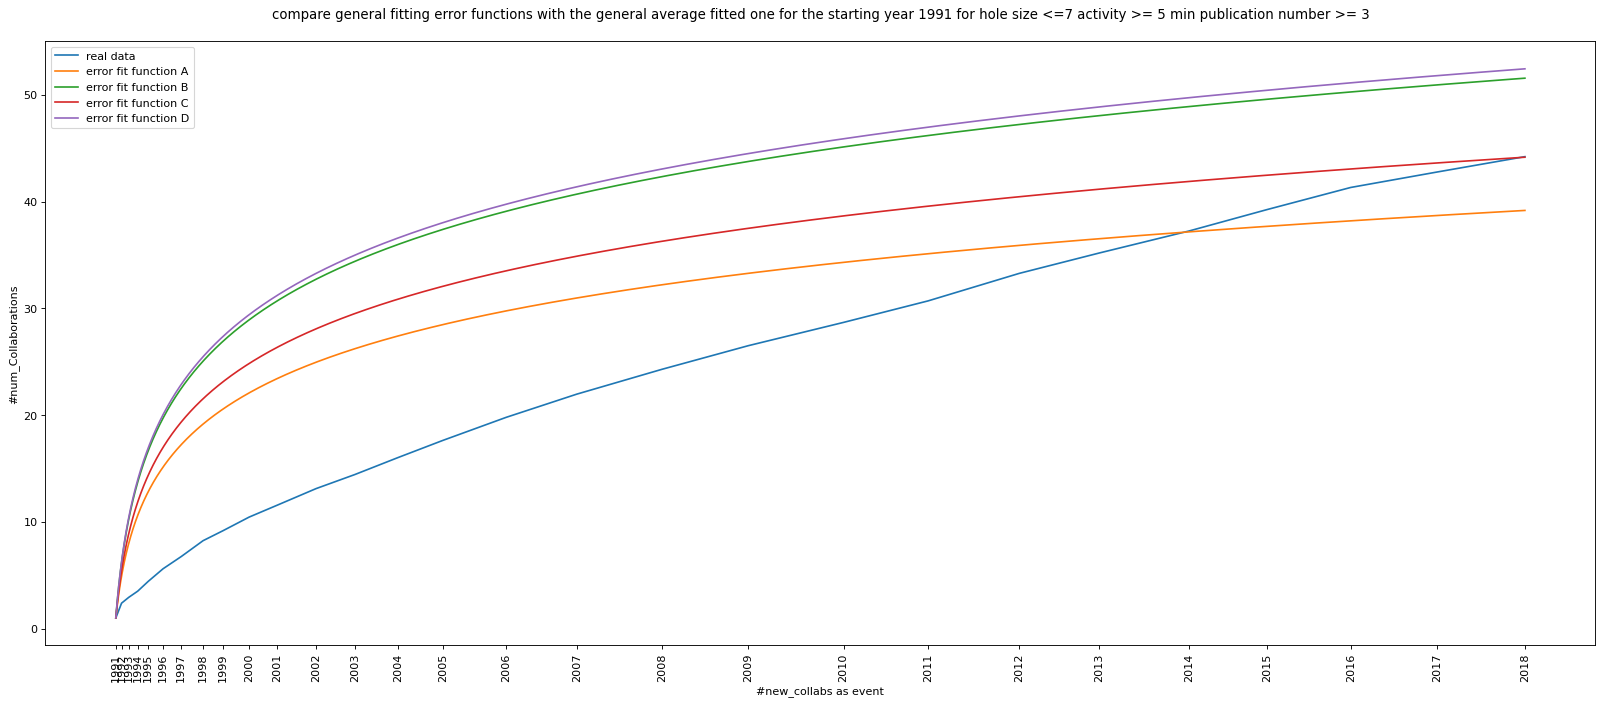

In [16]:
plot_all("1991")

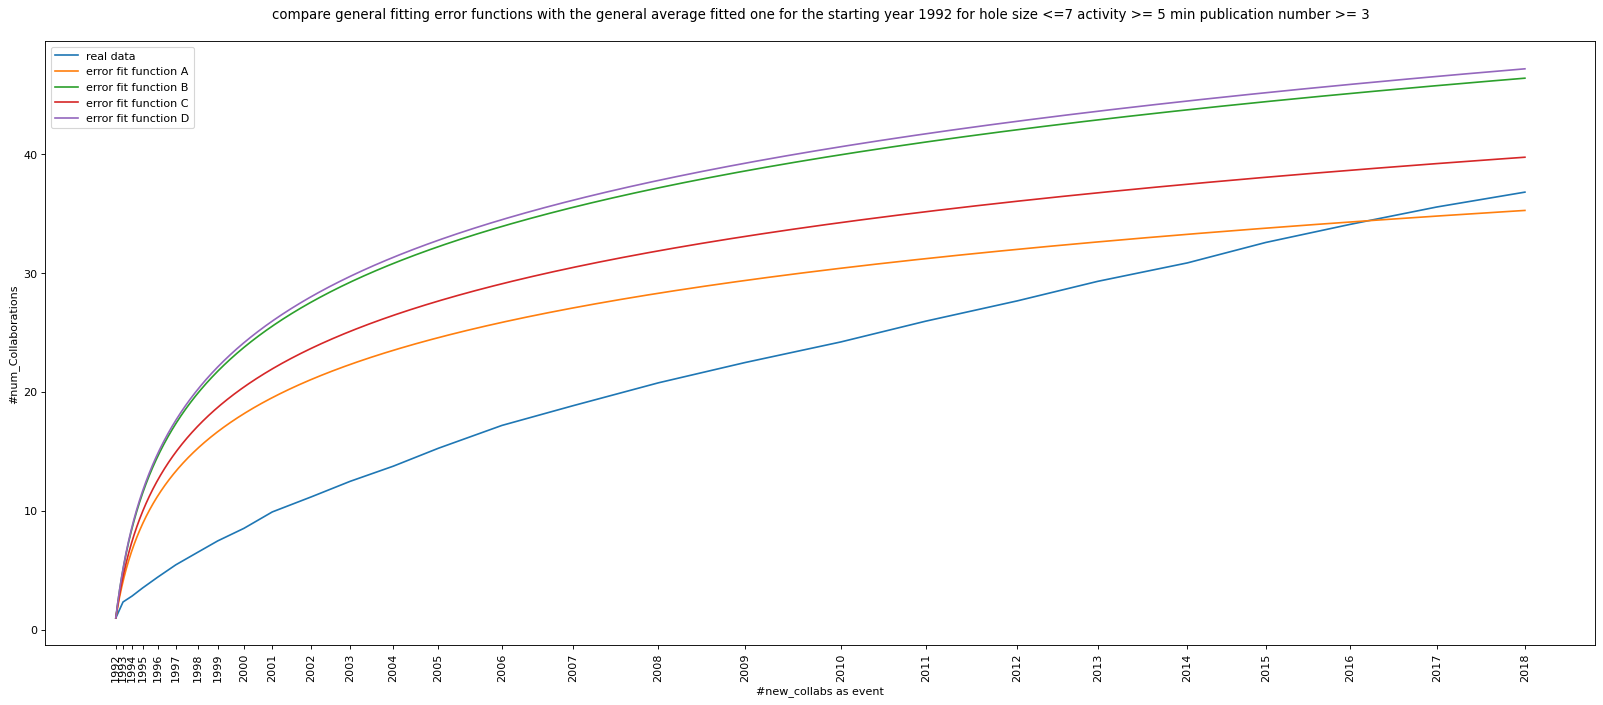

In [17]:
plot_all("1992")

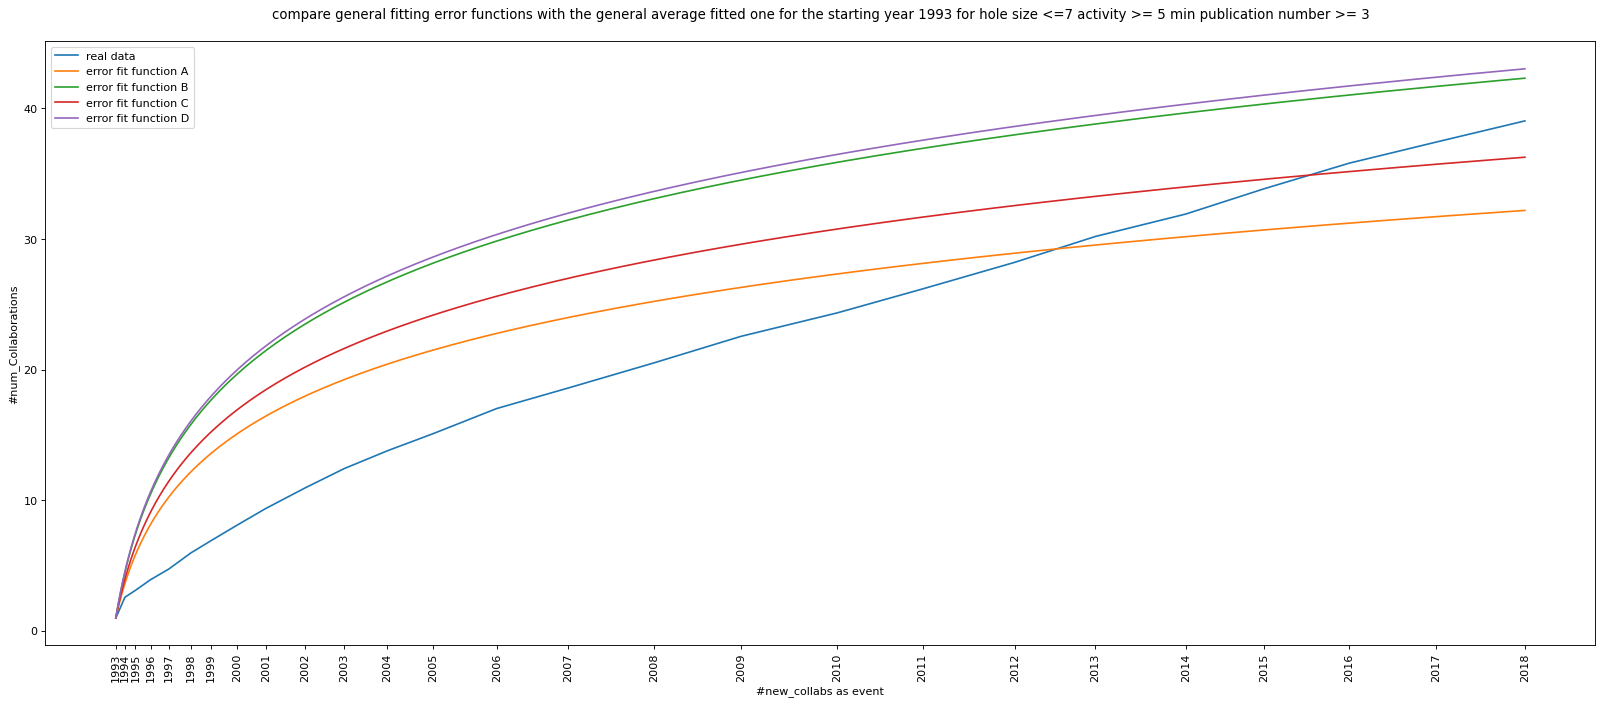

In [18]:
plot_all("1993")

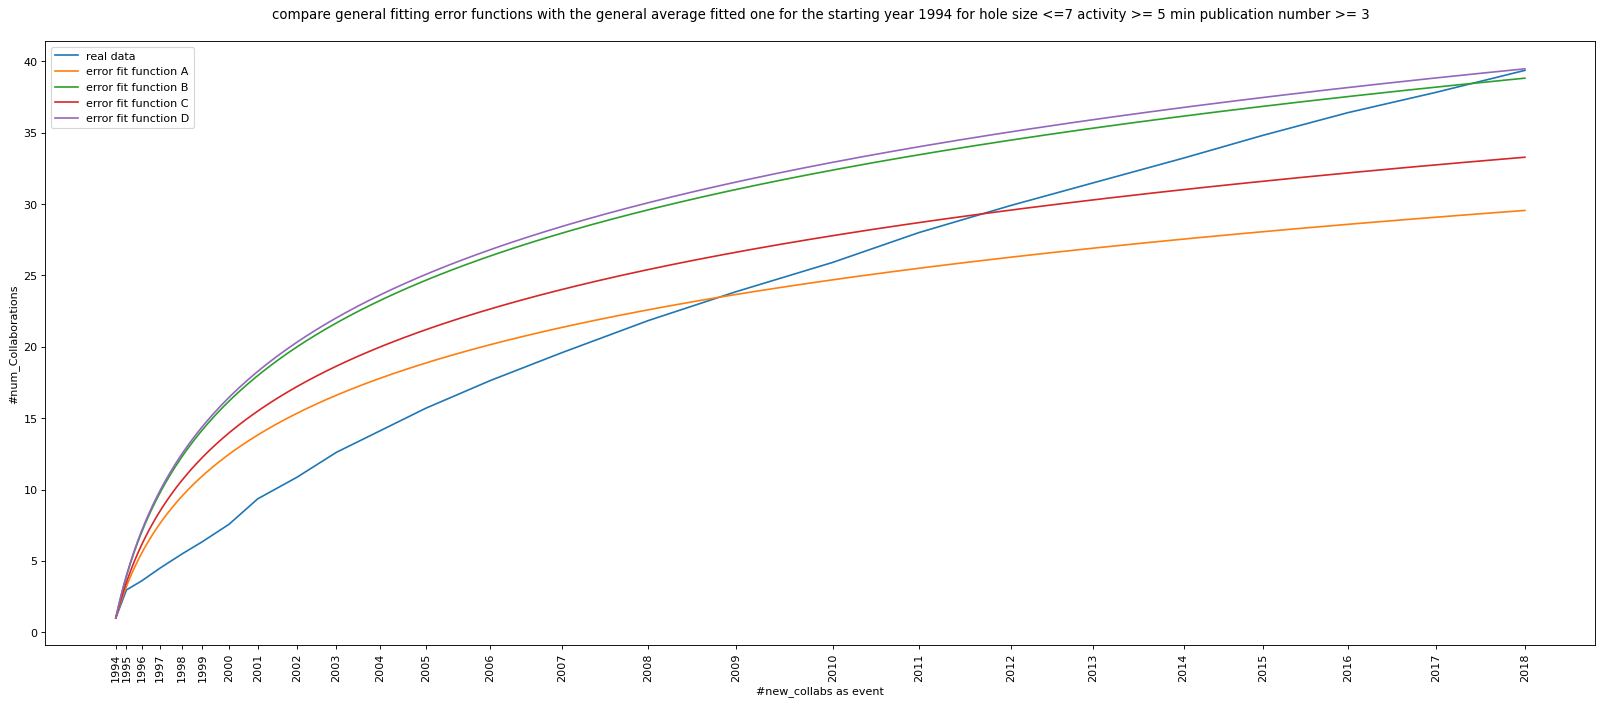

In [19]:
plot_all("1994")

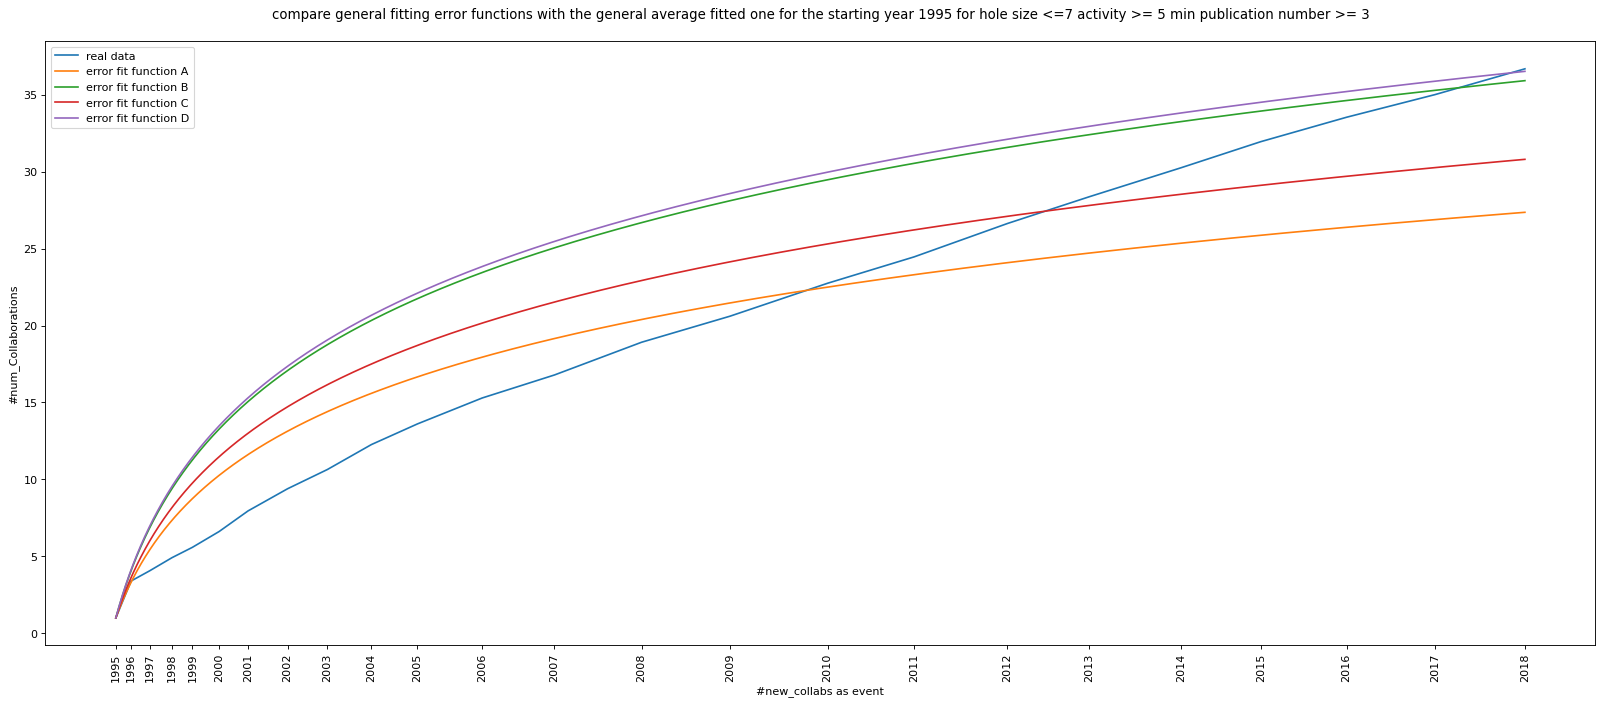

In [20]:
plot_all("1995")

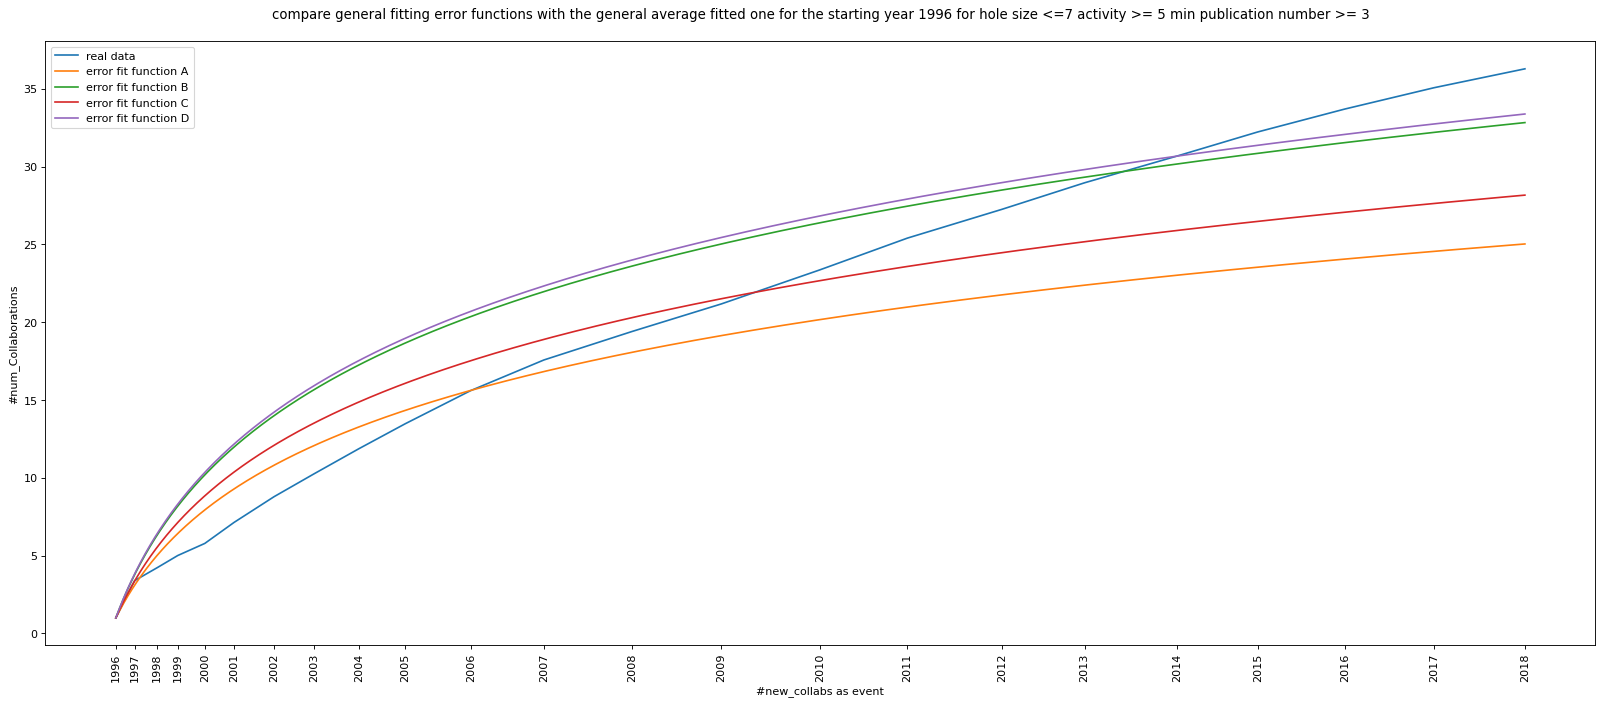

In [21]:
plot_all("1996")

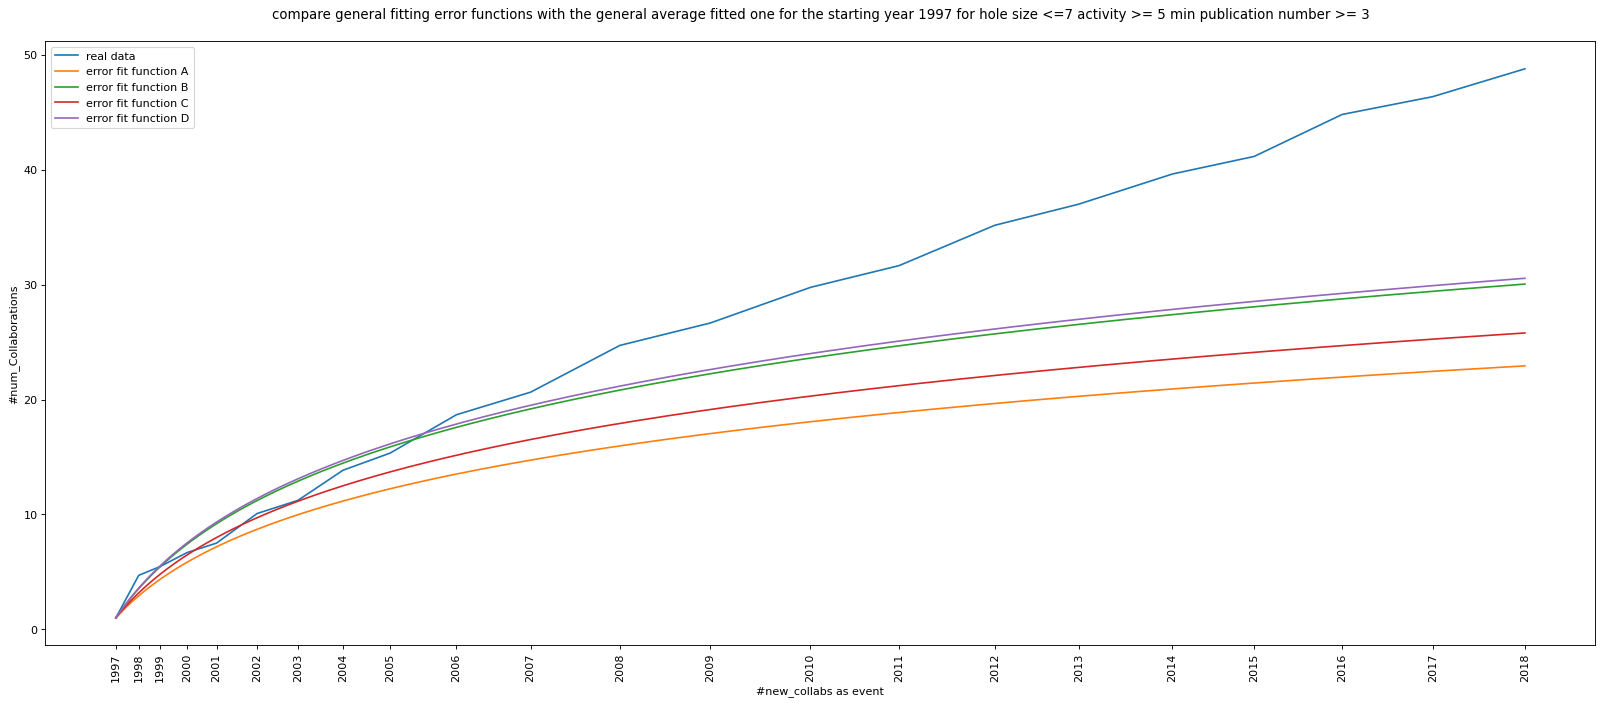

In [22]:
plot_all("1997")

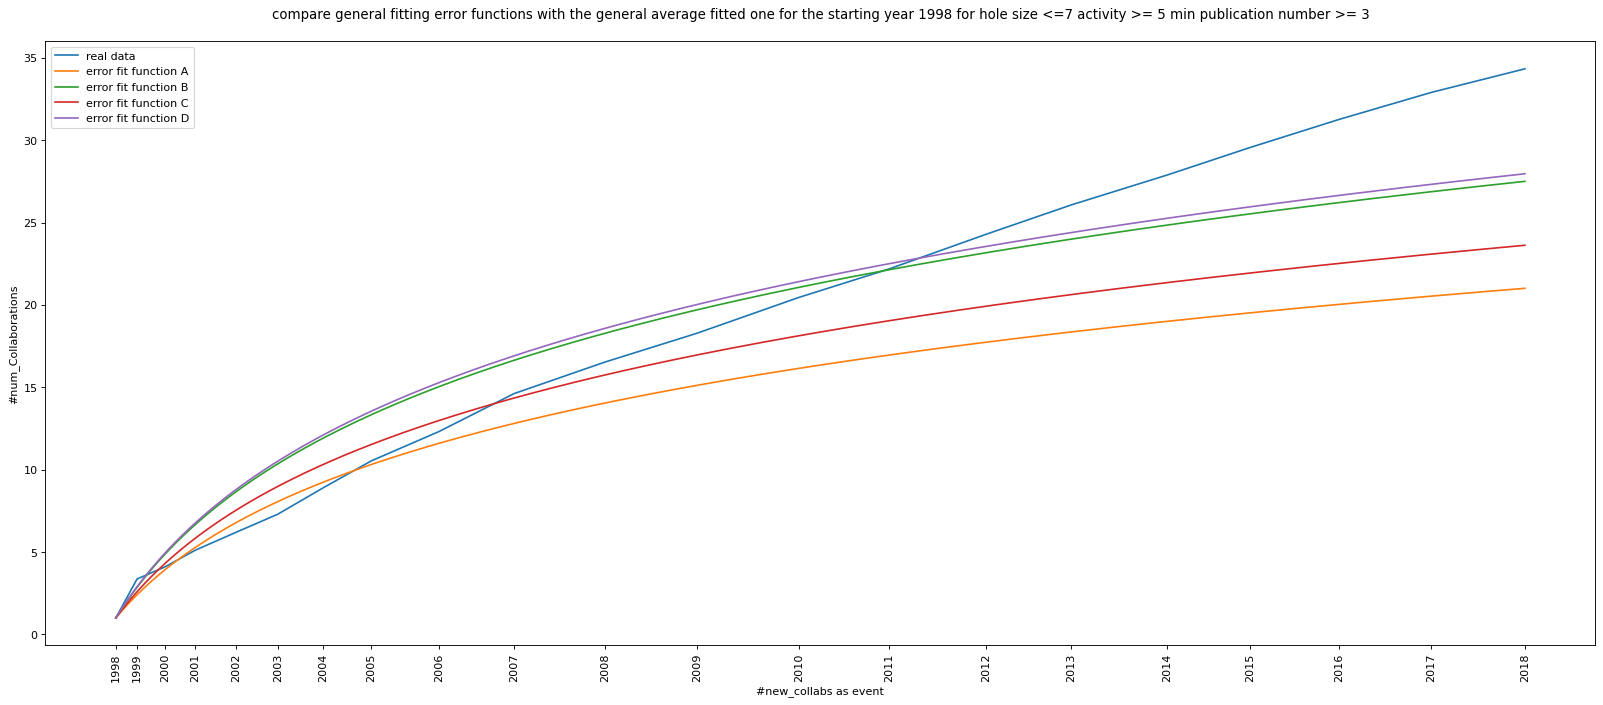

In [23]:
plot_all("1998")

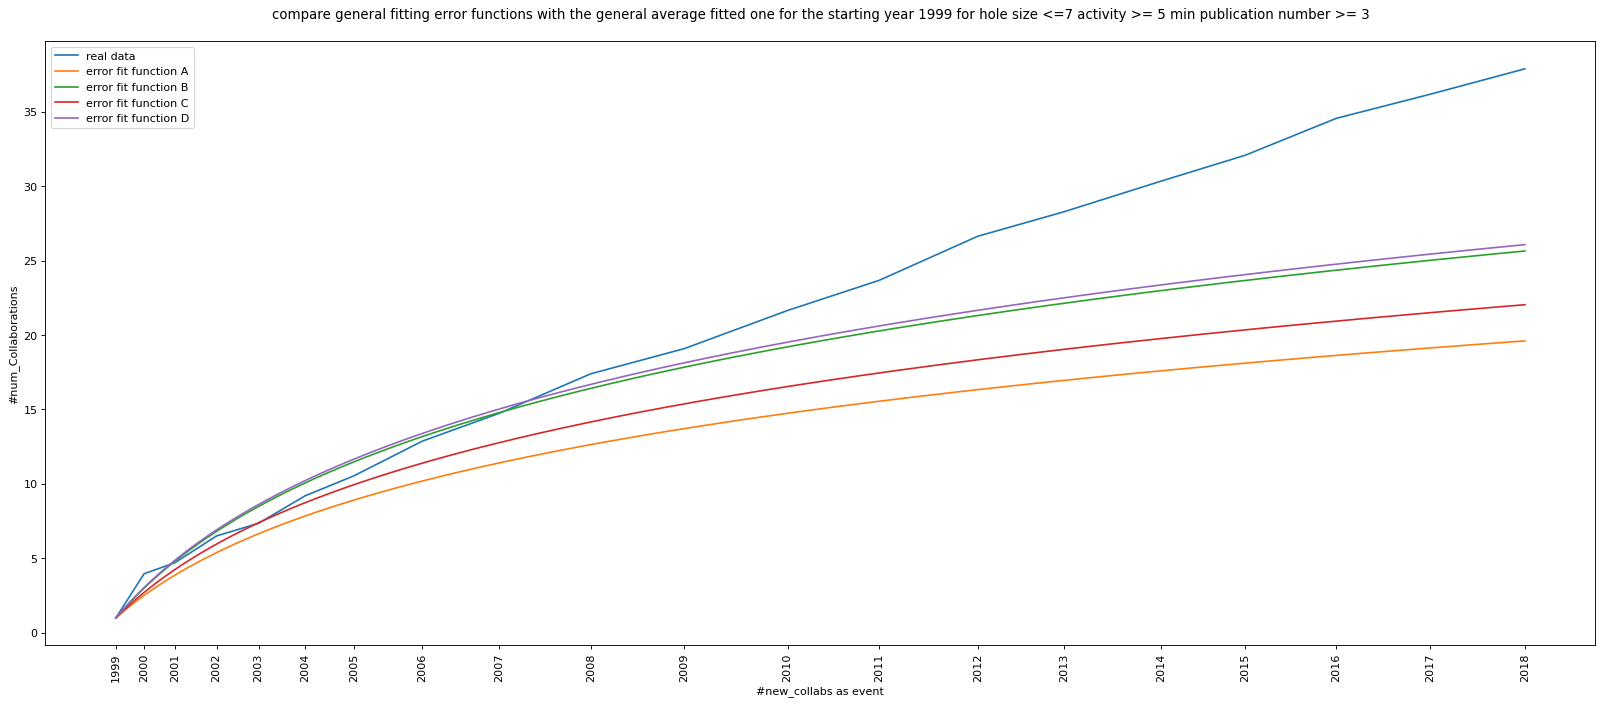

In [24]:
plot_all("1999")

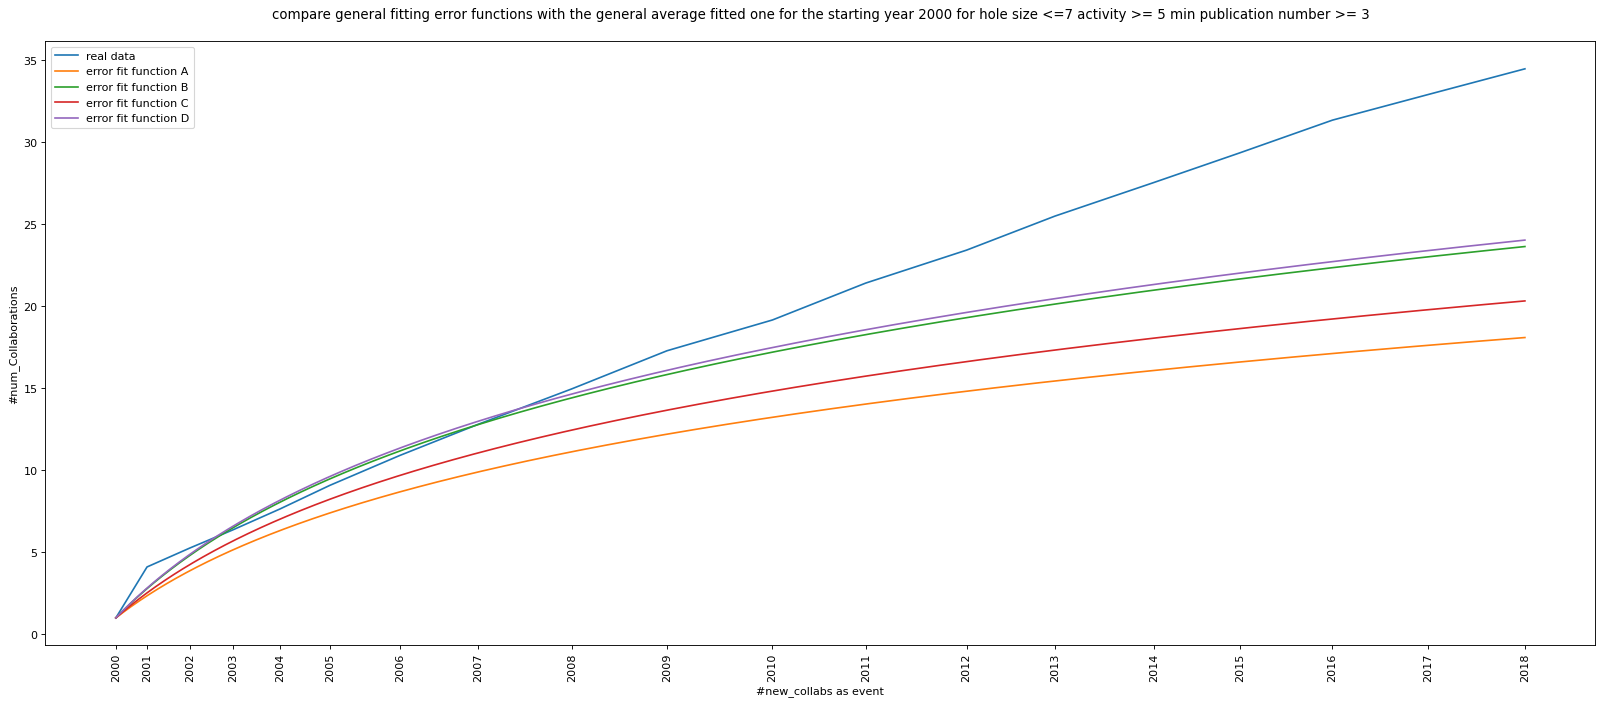

In [25]:
plot_all("2000")

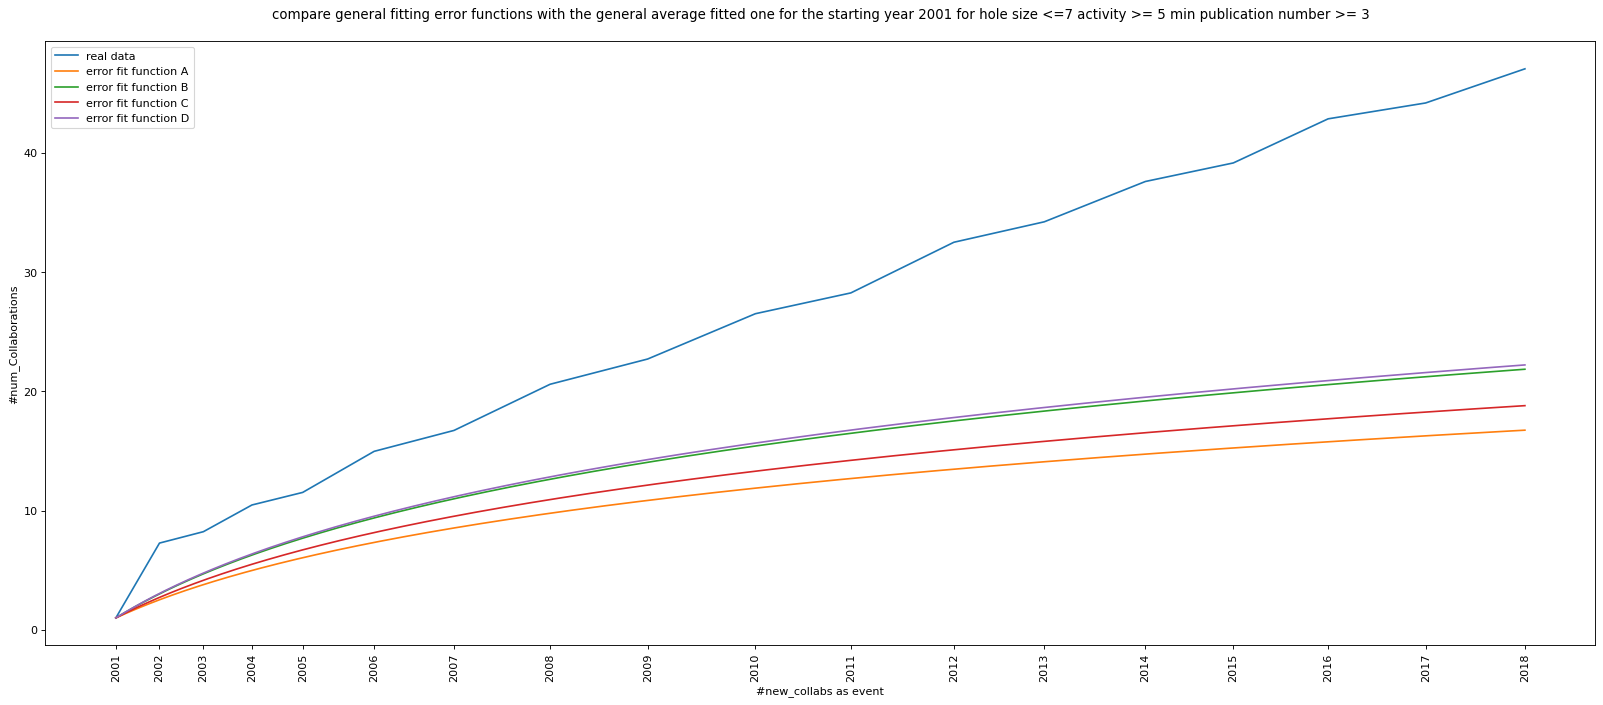

In [26]:
plot_all("2001")

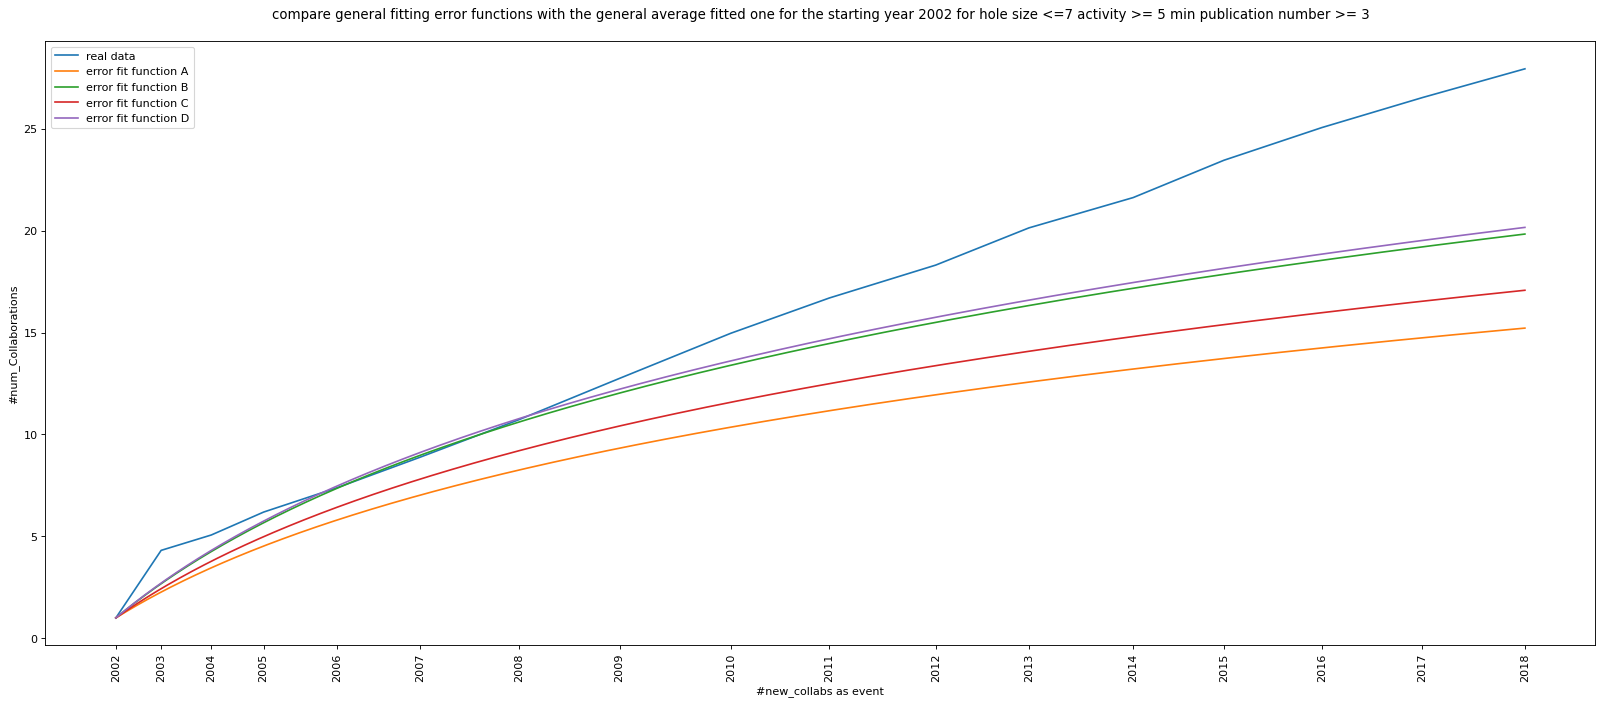

In [27]:
plot_all("2002")

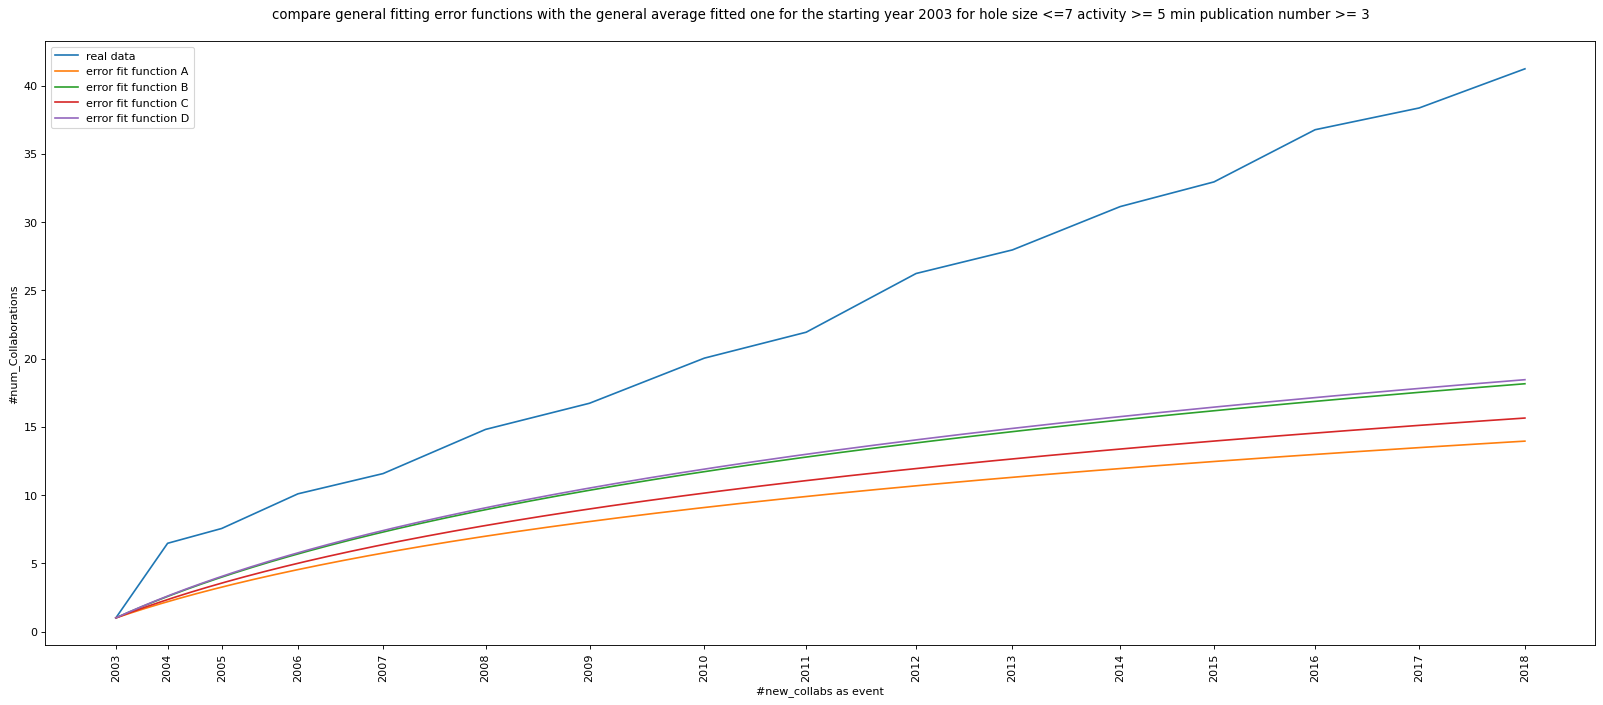

In [28]:
plot_all("2003")

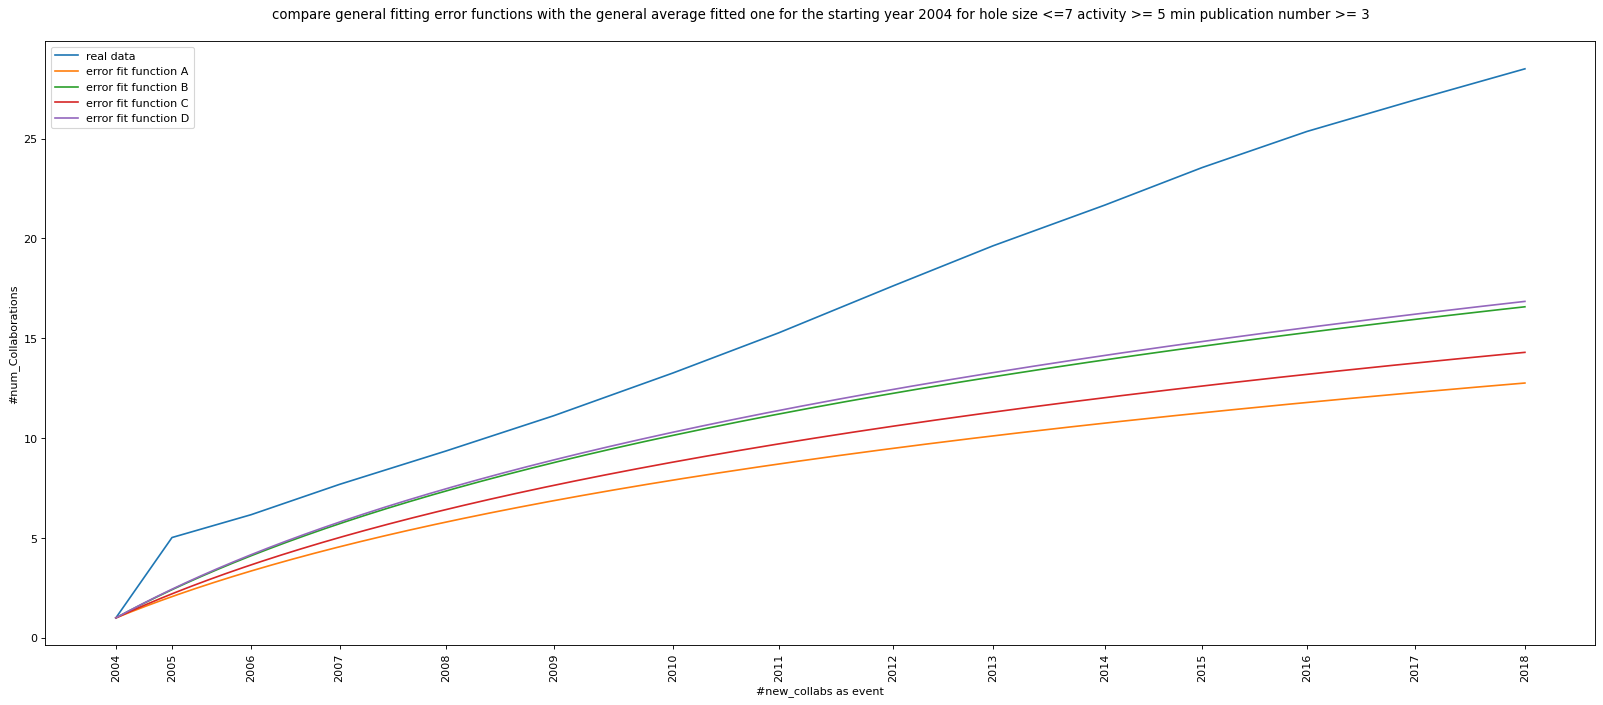

In [29]:
plot_all("2004")

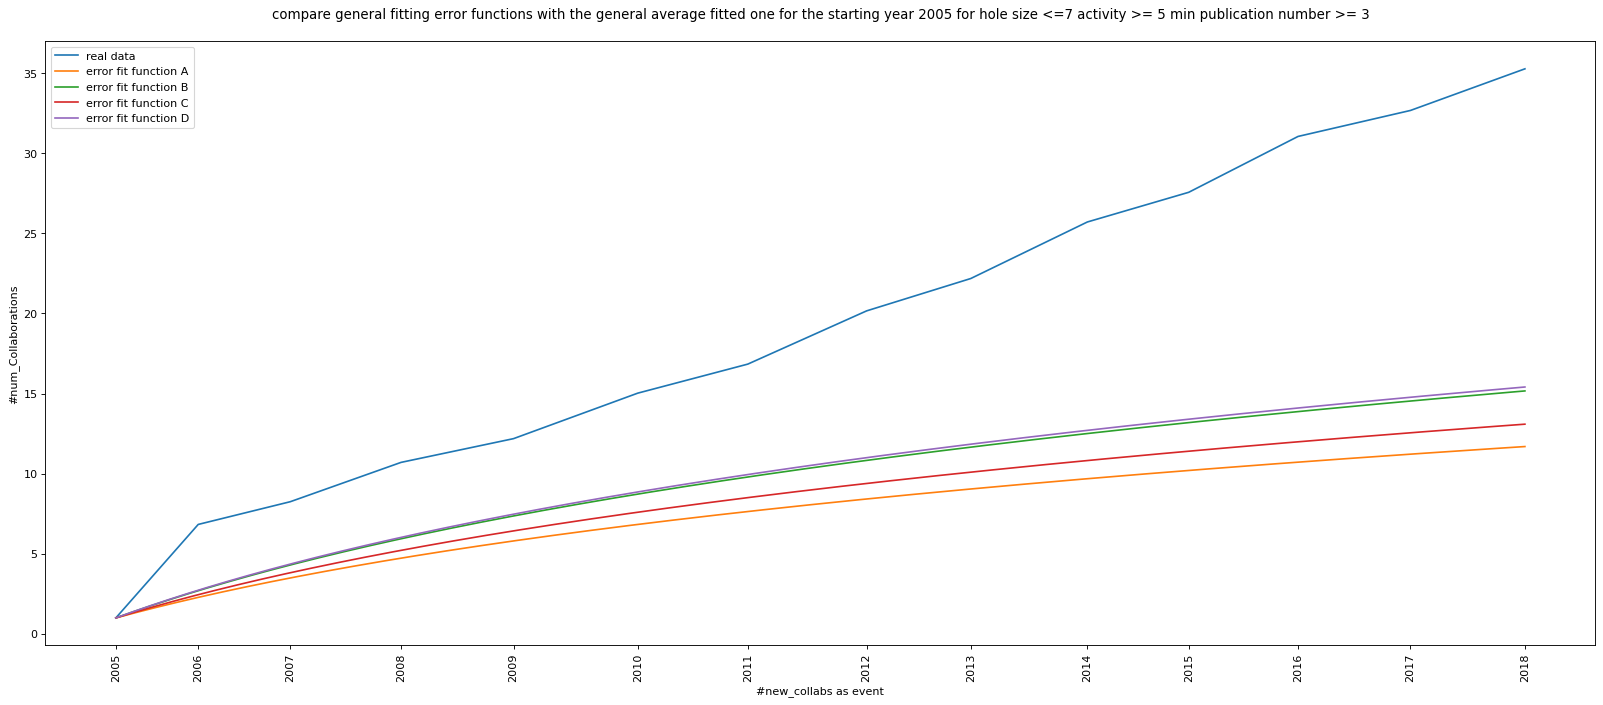

In [30]:
plot_all("2005")

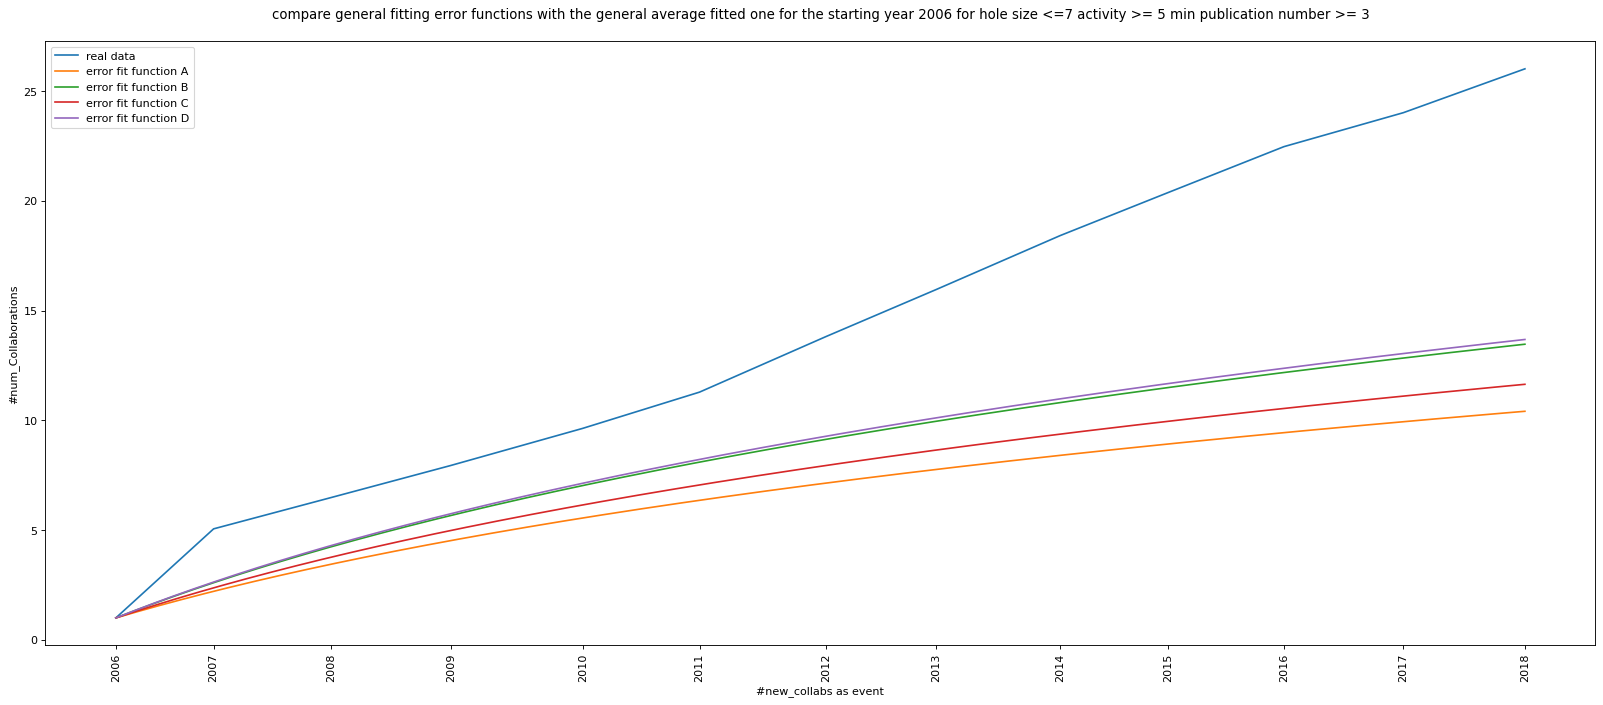

In [31]:
plot_all("2006")

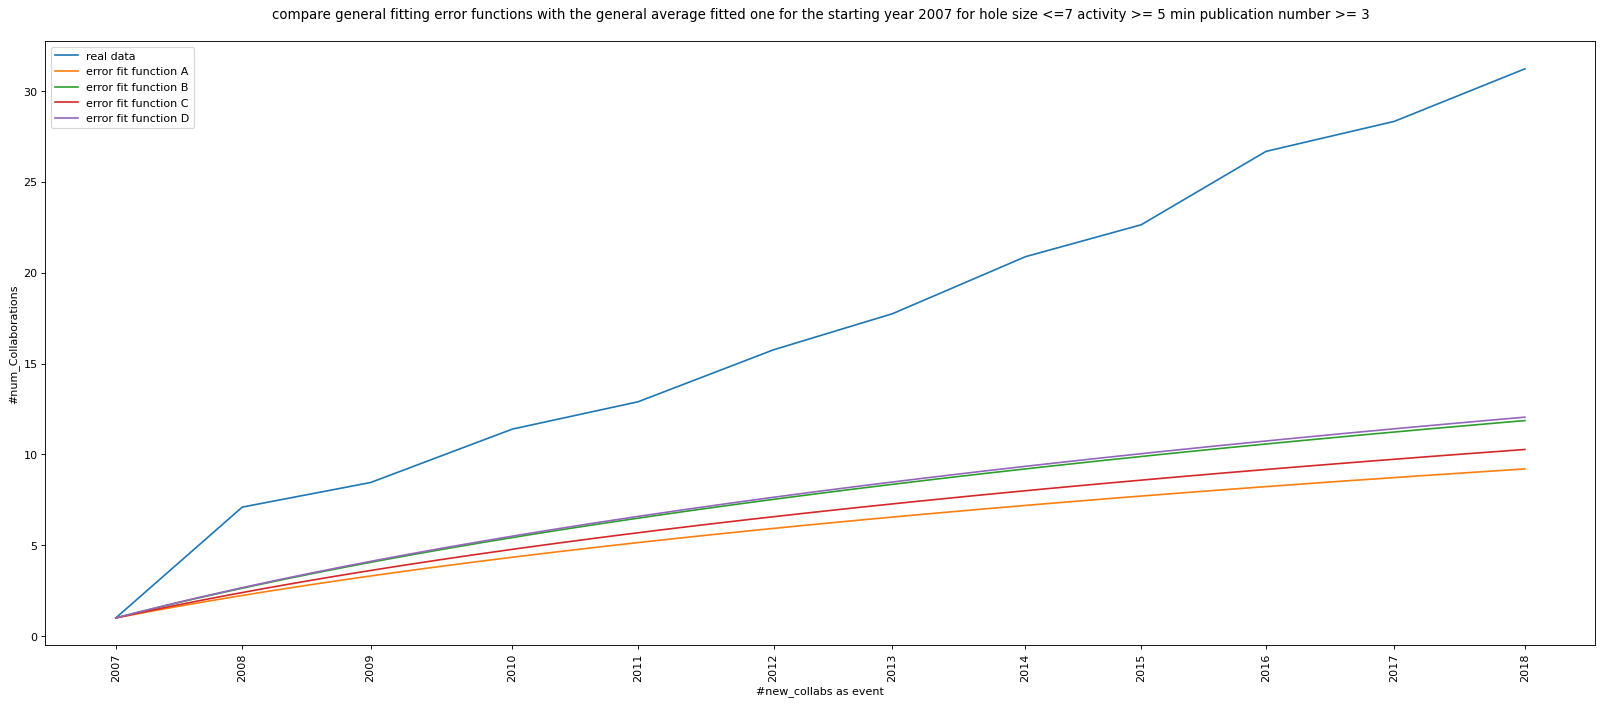

In [32]:
plot_all("2007")

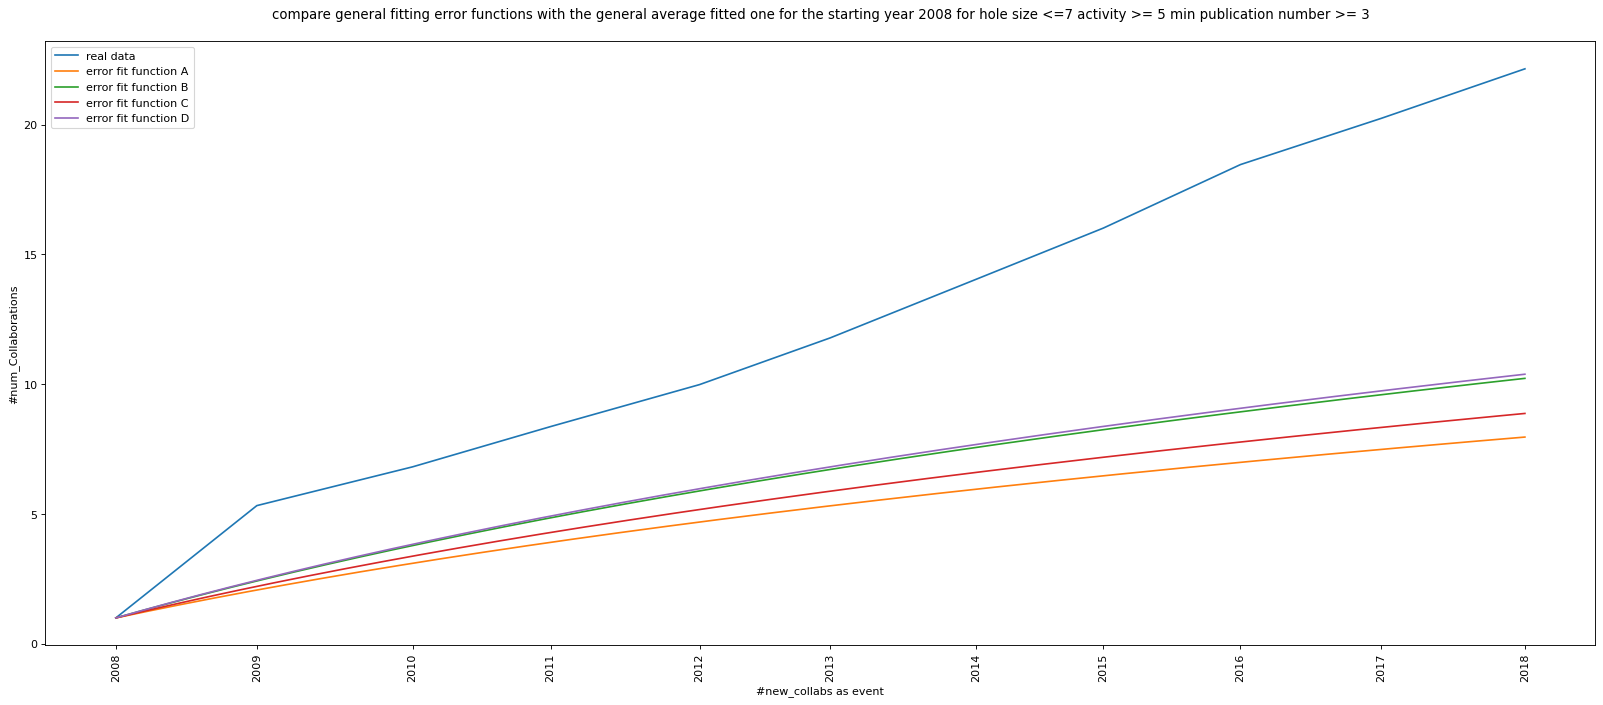

In [33]:
plot_all("2008")

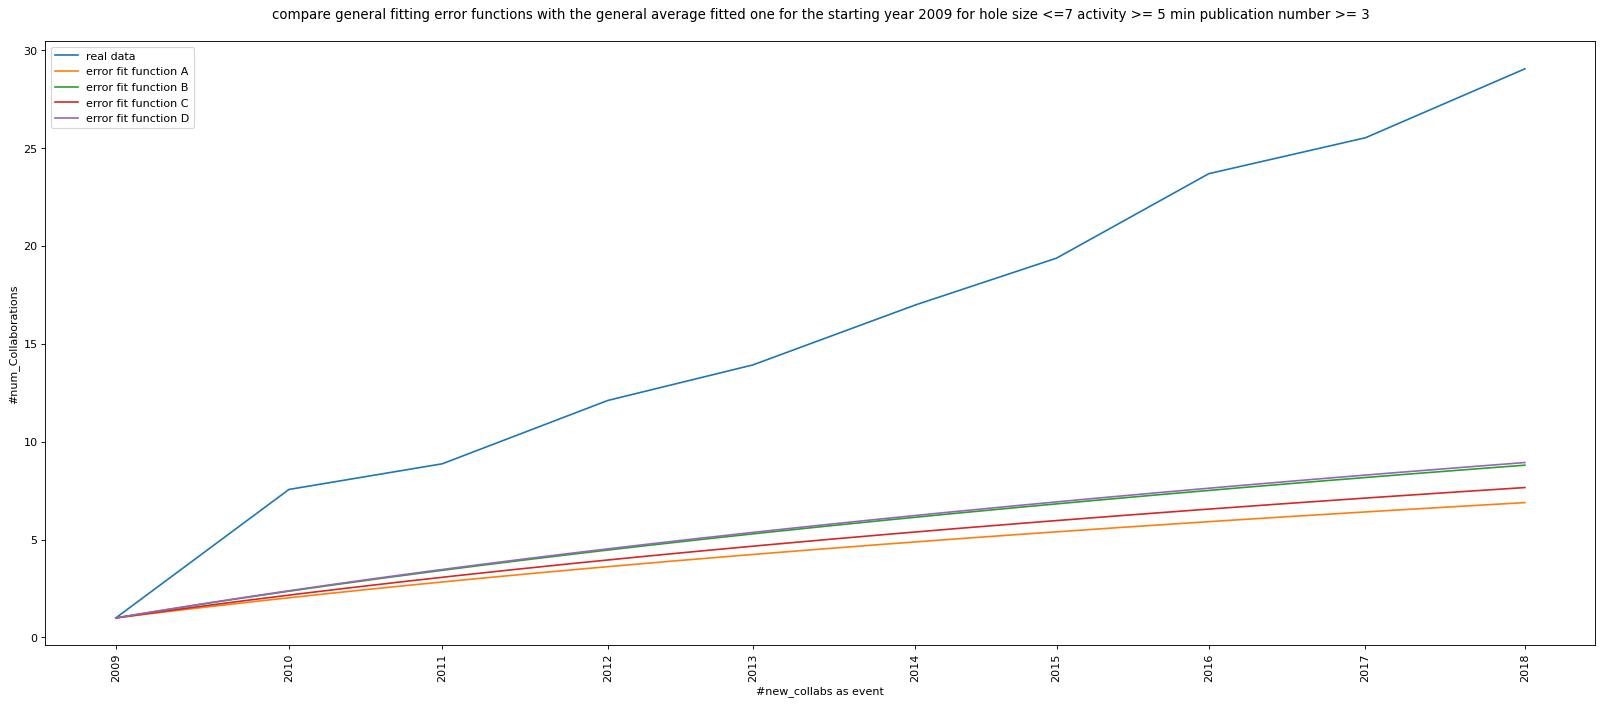

In [34]:
plot_all("2009")

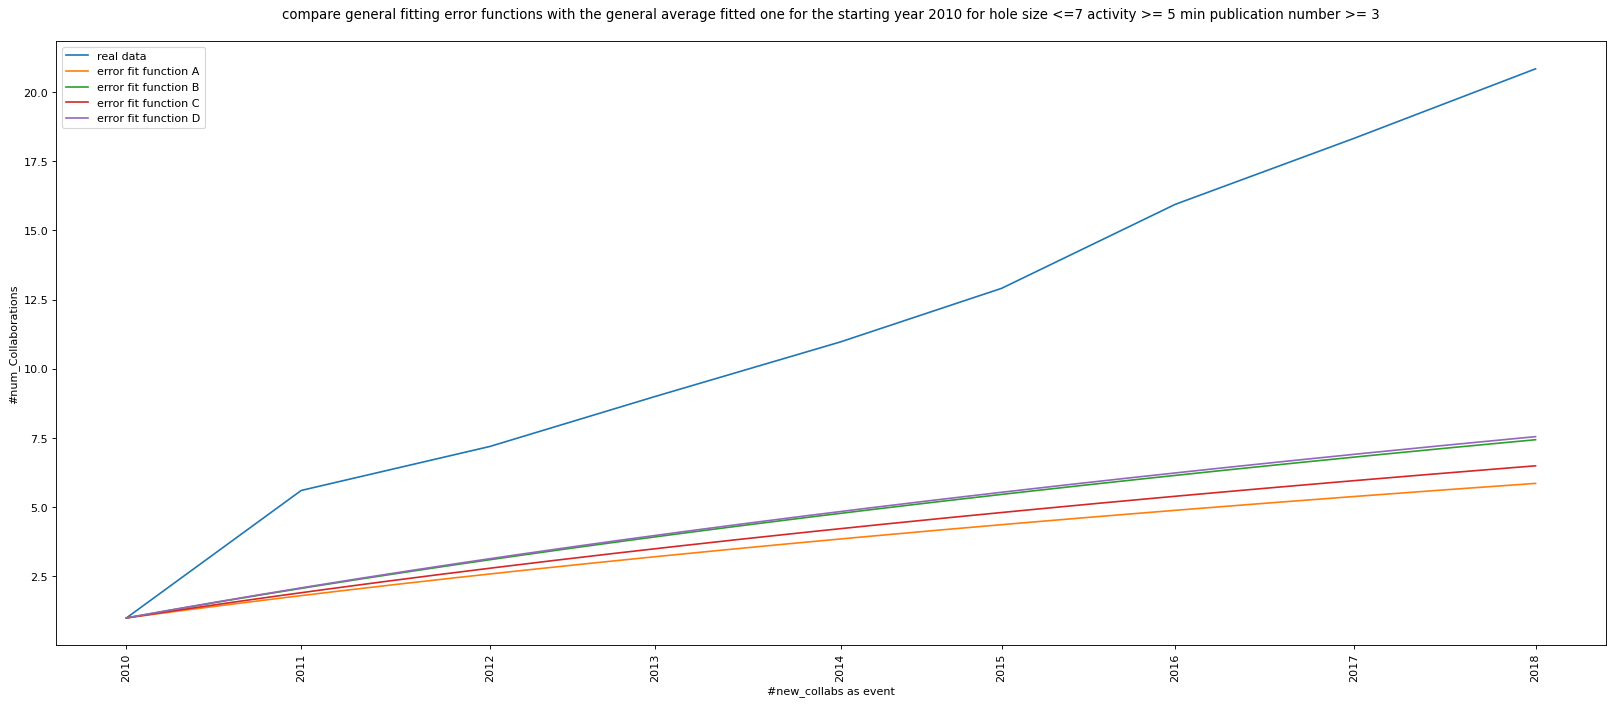

In [35]:
plot_all("2010")

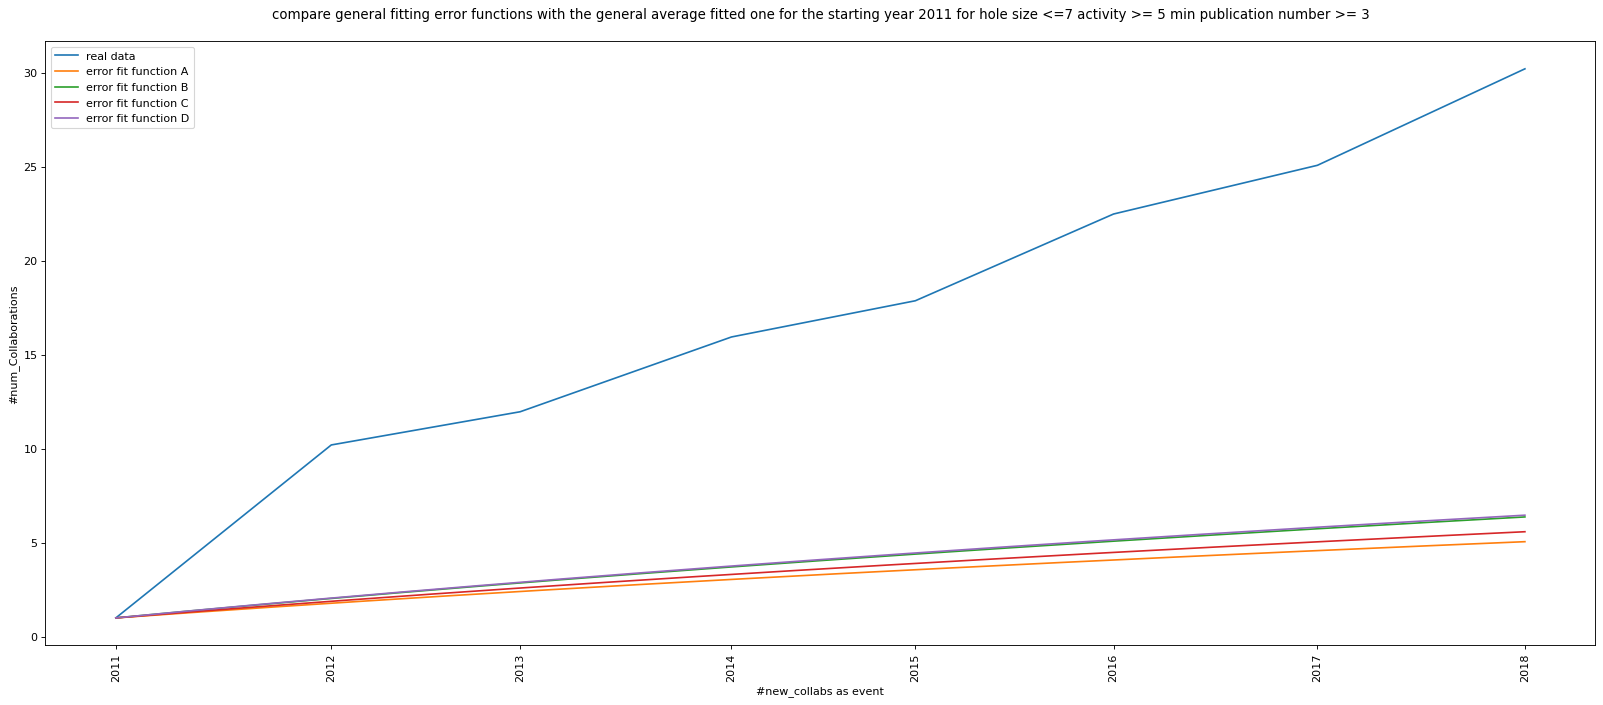

In [36]:
plot_all("2011")

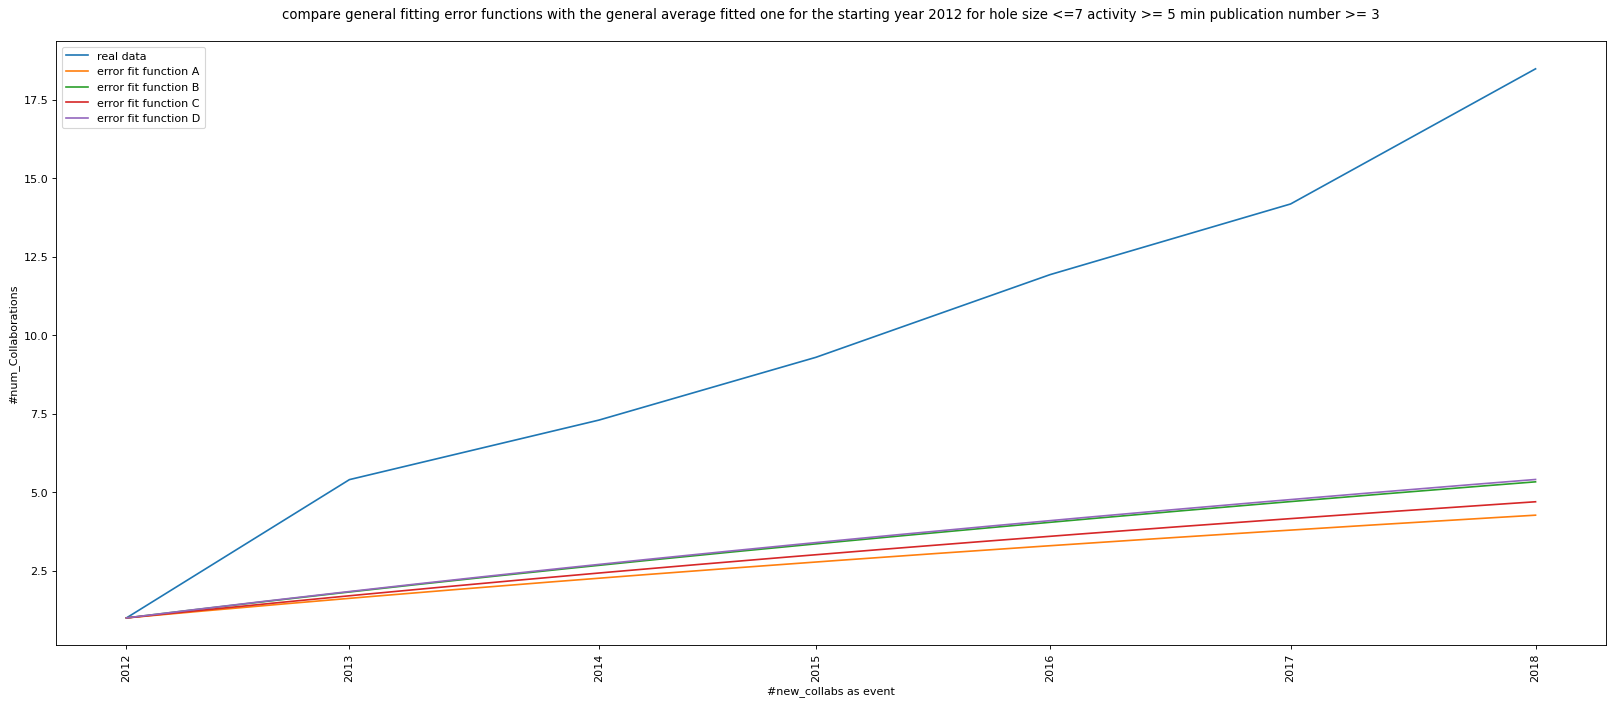

In [37]:
plot_all("2012")